# Mutational profile

In [27]:
%run /workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py

In [14]:
import json
samples_dict = json.load(open('/workspace/projects/sjd_pediatric_tumors/code/sample_ids.json','rb'))
samples_dict

{'pt1': {'normal': 'AQ5174',
  'tumor1': 'AQ5180',
  'tumor2': 'AQ5186',
  'sex': 'female',
  'kidney': 'AX4954',
  'liver': 'AX4955',
  'pancreas': 'AX4956',
  'heart': 'AX4957',
  'clone1': 'AX4958',
  'clone2': 'AX4961',
  'mother': 'AW8063',
  'father': 'AW8064',
  'lung': 'AX4962',
  'medulla': 'AX4963',
  'spleen': 'AX4964',
  'brain': 'AX4965',
  'bma': 'AX4966'},
 'pt2': {'normal': 'AQ5175',
  'tumor1': 'AQ5181',
  'tumor2': 'AQ5187',
  'sex': 'female'},
 'pt3': {'normal': 'AQ5176',
  'tumor1': 'AQ5182',
  'tumor2': 'AQ5188',
  'sex': 'male'},
 'pt4': {'normal': 'AQ5177',
  'tumor1': 'AQ5183',
  'tumor2': 'AQ5189',
  'sex': 'female'},
 'pt5': {'normal': 'AQ5178',
  'tumor1': 'AQ5184',
  'tumor2': 'AQ5190',
  'sex': 'male'},
 'pt6': {'normal': 'AQ5179',
  'tumor1': 'AQ5185',
  'tumor2': 'AQ5191',
  'sex': 'female'},
 'pt7': {'normal': 'AW8058',
  'tumor1': 'AW8048',
  'tumor2': 'AW8049',
  'sex': 'female'},
 'pt8': {'normal': 'AW8061',
  'tumor1': 'AW8050',
  'tumor2': 'AW8051',

# All mutations ------------------------------------------------------------------------

In [3]:

for pt in samples_dict.keys():
    if pt != 'pt9':
        for tumor in ['tumor1','tumor2']:
            normal_id = samples_dict[pt]['normal']
            tumor_id = samples_dict[pt][tumor]
            for caller in ['mutect','strelka','sage','intersect']:
                if caller == 'intersect':
                    df = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/process_vep_output/"+tumor_id+"_vs_"+normal_id+".maf.gz", sep='\t')
                else:
                    df = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/vcf_processing/"+caller+"/"+tumor_id+"_vs_"+normal_id+"_process.maf.gz", sep='\t')

                df = df[df['mut_type']=='snv']
                dictionary = df_to_dict(df)
                dict_counts = change_dct_format(dictionary)
                fig, ax = plt.subplots()
                title = pt+' '+tumor+' '+caller+' ('+str(len(df))+ ' snv)'
                plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
                plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


KeyboardInterrupt: 

## Clonal mutations (intersect)

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


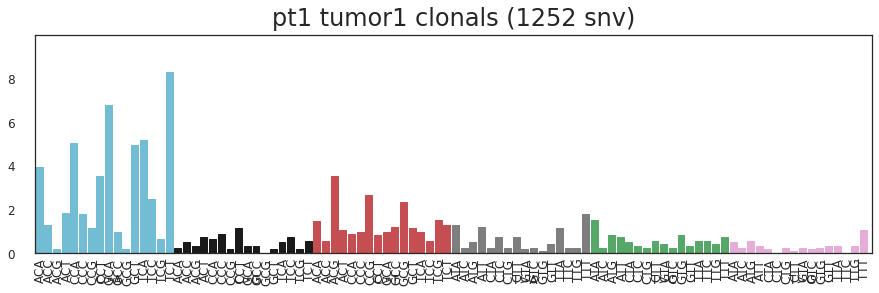

KeyboardInterrupt: 

In [20]:

for pt in samples_dict.keys():
    if pt != 'pt9':
        for tumor in ['tumor1','tumor2']:
            normal_id = samples_dict[pt]['normal']
            tumor_id = samples_dict[pt][tumor]
            df = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_filt.maf.gz", sep='\t')
            df = df[(df['mut_type']=='snv')&(df['clonal']==True)]
            dictionary = df_to_dict(df)
            dict_counts = change_dct_format(dictionary)
            fig, ax = plt.subplots()
            title = pt+' '+tumor+' clonals ('+str(len(df))+ ' snv)'
            plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
            plt.show()

In [5]:
title_dict = {'pt1_tumor1':'Case 3, NB',
             'pt1_tumor2':'Case 3, MRT',
             'pt2_tumor1':'Case 1, ARMS',
             'pt2_tumor2':'Case 1, tAML',
             'pt3_tumor1':'Case 2, EPN',
             'pt3_tumor2':'Case 2, DMG',
             'pt8_tumor1':'Case 4, BL',
             'pt8_tumor2':'Case 4, THC'}

/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


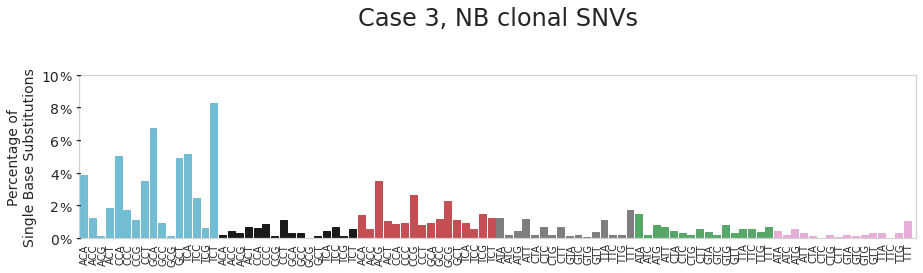

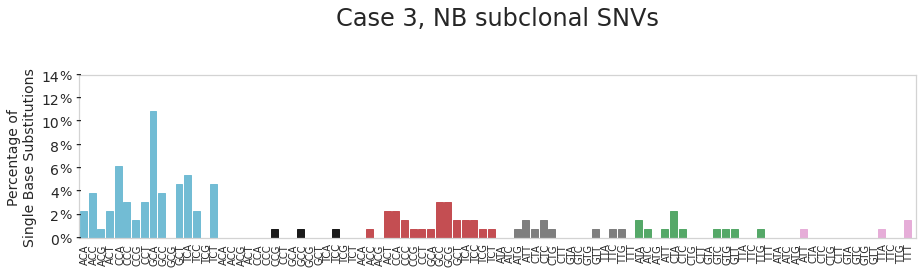

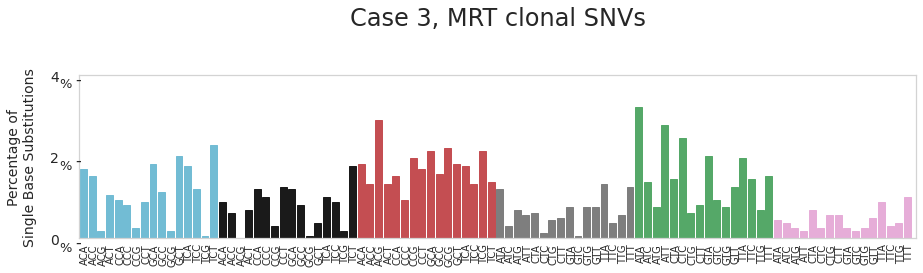

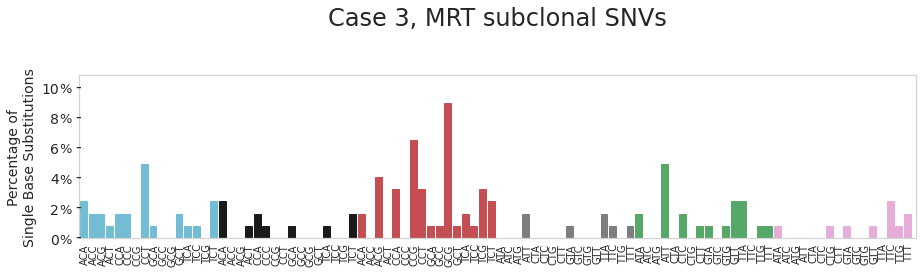

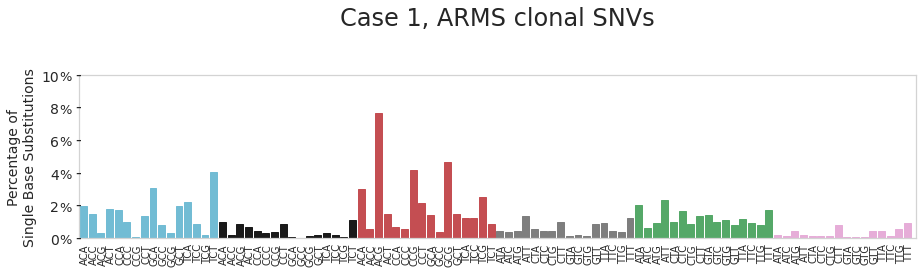

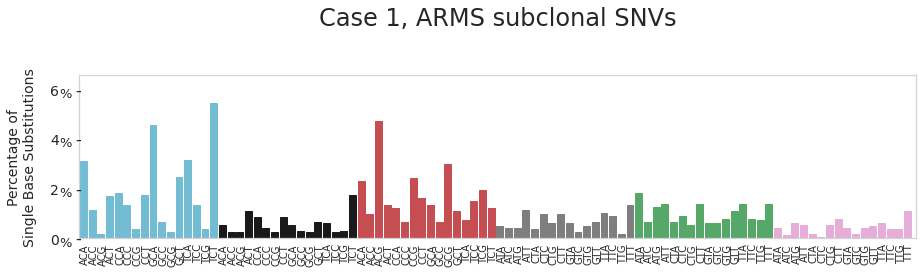

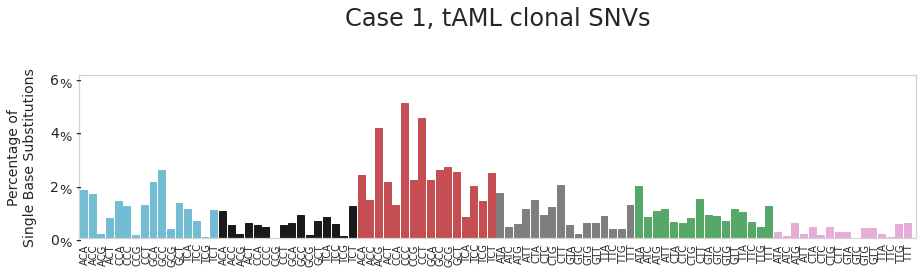

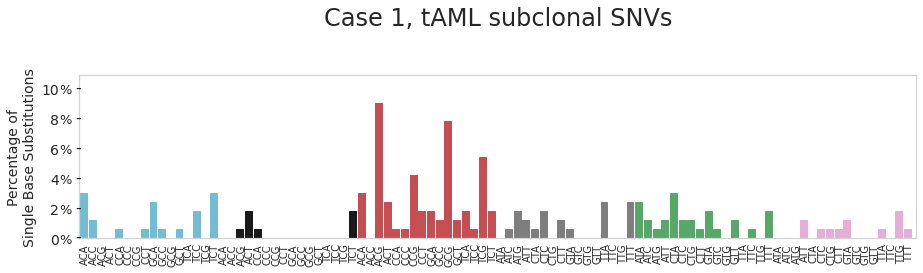

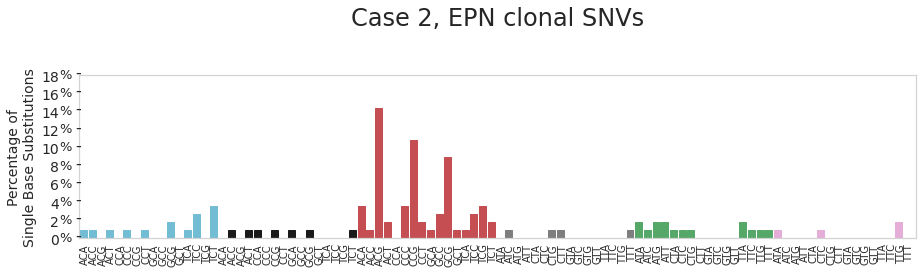

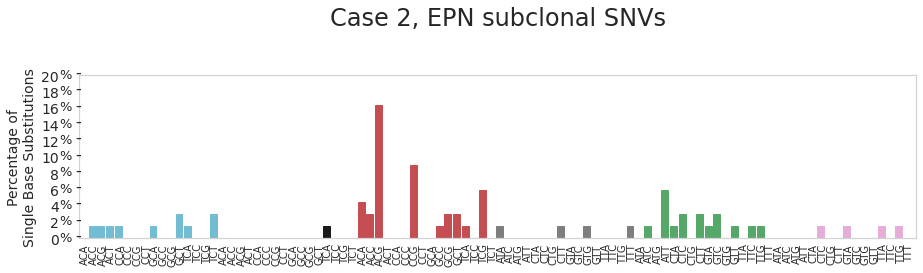

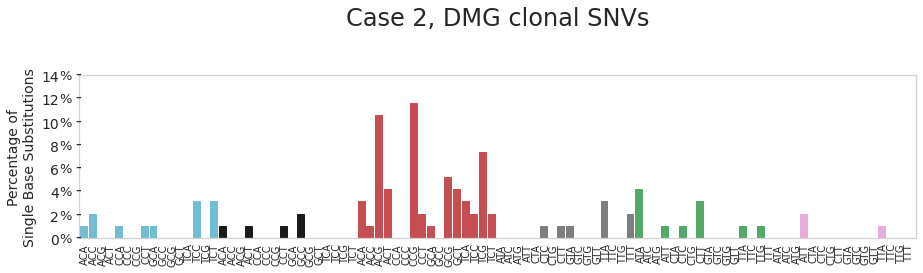

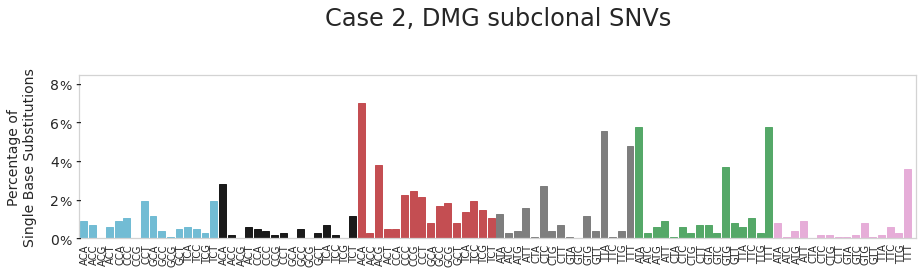

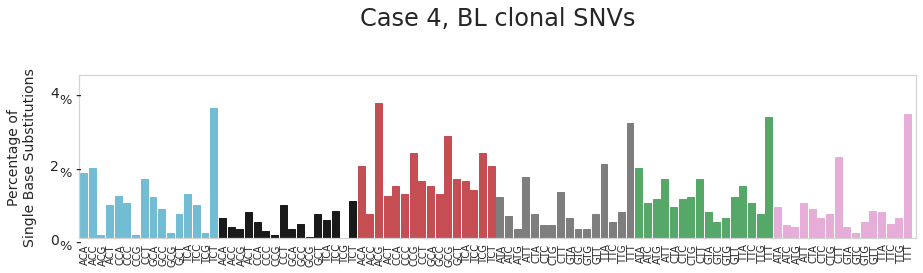

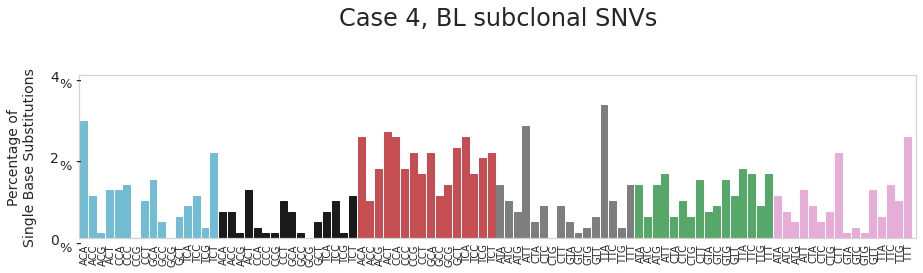

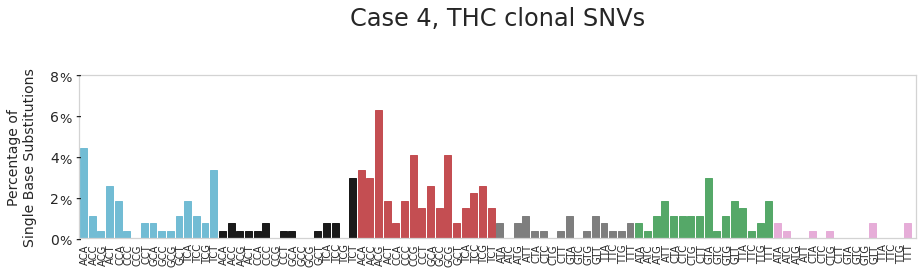

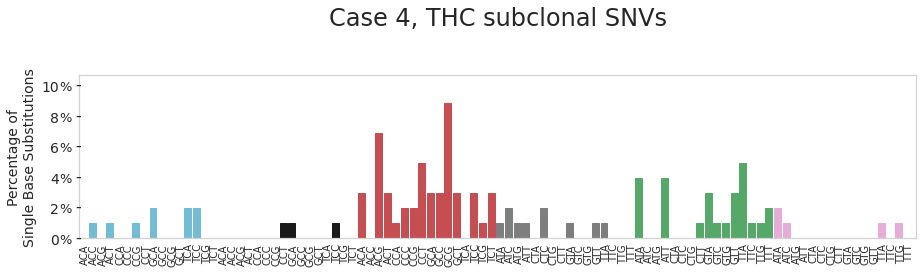

In [29]:

for pt in ['pt1','pt2','pt3','pt8']:
    for tumor in ['tumor1','tumor2']:
        normal_id = samples_dict[pt]['normal']
        tumor_id = samples_dict[pt][tumor]
        df1 = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_filt.maf.gz", sep='\t')
        for setting in ['clonal','subclonal']:
            if setting == 'clonal':
                df = df1[(df1['mut_type']=='snv')&(df1['clonal']==True)]
            else:
                df = df1[(df1['mut_type']=='snv')&(df1['clonal']==False)]
            dictionary = df_to_dict(df)

            dict_counts = change_dct_format(dictionary)
            fig, ax = plt.subplots()
            title = title_dict[pt+'_'+tumor] +' '+ setting + ' SNVs'
            plot_signature(dict_counts, title=title ,fig=fig,ax=ax,figsize=(15,3),pad=50,labels=[])
            plt.ylabel('Percentage of\nSingle Base Substitutions',size=14)
            ax.yaxis.set_label_coords(-.05, .5)
            ymin, ymax = ax.get_ylim()
            plt.yticks(np.arange(int(ymin), int(ymax)+2, 2.0))
            for pos in range(0,int(ymax)+2,2):
                plt.text(x=-2.8,y=pos-0.3,s='%',size=13)
            for pos in range(0,int(ymax)+2,2):
                plt.text(x=-1,y=pos-0.2,s='-',size=16)
            ax.spines['left'].set_color('lightgrey')        
            ax.spines['top'].set_color('lightgrey')  
            ax.spines['bottom'].set_color('lightgrey')        
            ax.spines['right'].set_color('lightgrey') 
            ax.grid(False)
            plt.savefig("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_"+setting+"_profile.png",dpi=300, format='png',transparent=True,bbox_inches='tight')

            plt.show()

In [10]:
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,intogen,germline,germline_mskcc,germline_akh,role,variant_type,CN,t_CCF,n_CCF,clonal


/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


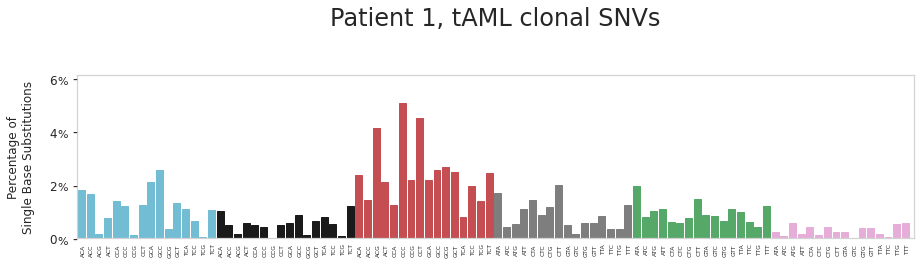

In [22]:
pt = 'pt2'
tumor = 'tumor2'
normal_id = samples_dict[pt]['normal']
tumor_id = samples_dict[pt][tumor]
df = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_filt.maf.gz", sep='\t')
df = df[(df['mut_type']=='snv')&(df['clonal']==True)]
dictionary = df_to_dict(df)

dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
plot_signature(dict_counts, title='Patient 1, tAML clonal SNVs' ,fig=fig,ax=ax,figsize=(15,3),pad=50,labels=[])
plt.ylabel('Percentage of\nSingle Base Substitutions',size=12)
ax.yaxis.set_label_coords(-.05, .5)
for pos in range(0,7,2):
    plt.text(x=-2.8,y=pos-0.2,s='%',size=11)
for pos in range(0,7,2):
    plt.text(x=-1,y=pos-0.2,s='-',size=14)
ax.spines['left'].set_color('lightgrey')        
ax.spines['top'].set_color('lightgrey')  
ax.spines['bottom'].set_color('lightgrey')        
ax.spines['right'].set_color('lightgrey') 
ax.grid(False)
plt.savefig("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_profile.png",dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


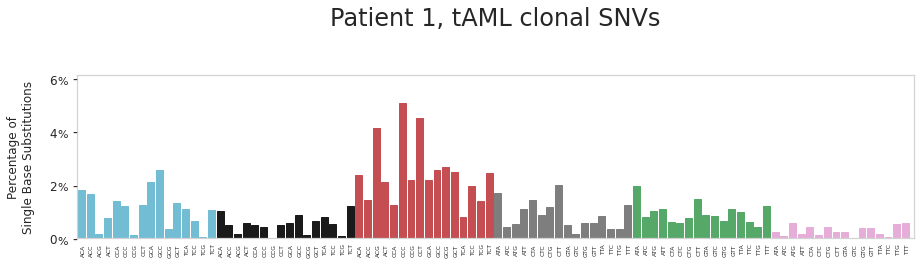

In [22]:
pt = 'pt2'
tumor = 'tumor2'
normal_id = samples_dict[pt]['normal']
tumor_id = samples_dict[pt][tumor]
df = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_filt.maf.gz", sep='\t')
df = df[(df['mut_type']=='snv')&(df['clonal']==True)]
dictionary = df_to_dict(df)

dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
plot_signature(dict_counts, title='Patient 1, tAML clonal SNVs' ,fig=fig,ax=ax,figsize=(15,3),pad=50,labels=[])
plt.ylabel('Percentage of\nSingle Base Substitutions',size=12)
ax.yaxis.set_label_coords(-.05, .5)
for pos in range(0,7,2):
    plt.text(x=-2.8,y=pos-0.2,s='%',size=11)
for pos in range(0,7,2):
    plt.text(x=-1,y=pos-0.2,s='-',size=14)
ax.spines['left'].set_color('lightgrey')        
ax.spines['top'].set_color('lightgrey')  
ax.spines['bottom'].set_color('lightgrey')        
ax.spines['right'].set_color('lightgrey') 
ax.grid(False)
plt.savefig("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_profile.png",dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


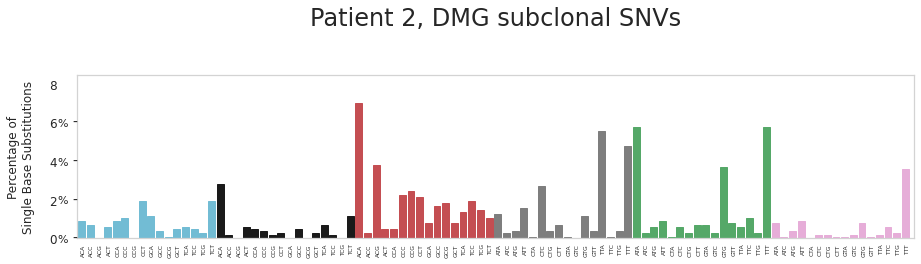

In [23]:
pt = 'pt3'
tumor = 'tumor2'
normal_id = samples_dict[pt]['normal']
tumor_id = samples_dict[pt][tumor]
df = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_filt.maf.gz", sep='\t')
df = df[(df['mut_type']=='snv')&(df['clonal']==False)]
dictionary = df_to_dict(df)

dict_counts = change_dct_format(dictionary)
fig, ax = plt.subplots()
plot_signature(dict_counts, title='Patient 2, DMG subclonal SNVs' ,fig=fig,ax=ax,figsize=(15,3),pad=50,labels=[])
plt.ylabel('Percentage of\nSingle Base Substitutions',size=12)
ax.yaxis.set_label_coords(-.05, .5)
for pos in range(0,7,2):
    plt.text(x=-2.8,y=pos-0.2,s='%',size=11)
for pos in range(0,7,2):
    plt.text(x=-1,y=pos-0.2,s='-',size=14)
ax.spines['left'].set_color('lightgrey')        
ax.spines['top'].set_color('lightgrey')  
ax.spines['bottom'].set_color('lightgrey')        
ax.spines['right'].set_color('lightgrey') 
ax.grid(False)
plt.savefig("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_profile.png",dpi=300, format='png',transparent=True,bbox_inches='tight')

plt.show()

## Subclonal mutations (intersect)

/workspace/projects/sjd_pediatric_tumors/code/filters/functions_to_plot_profiles.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep='first', inplace=True)


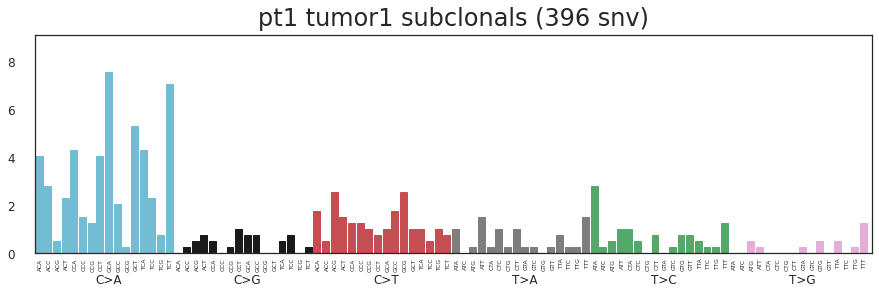

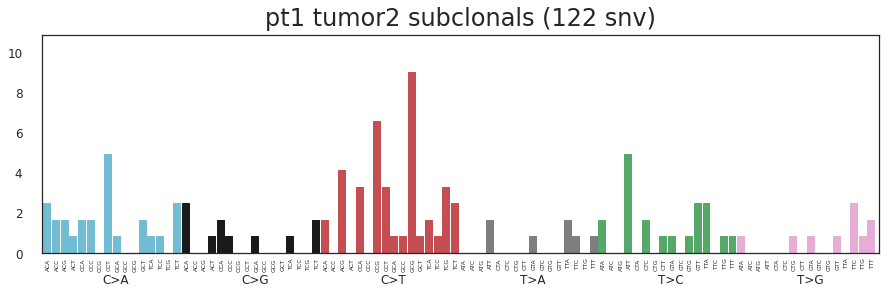

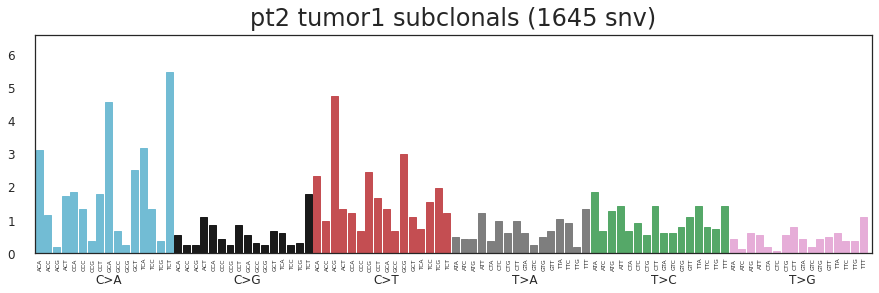

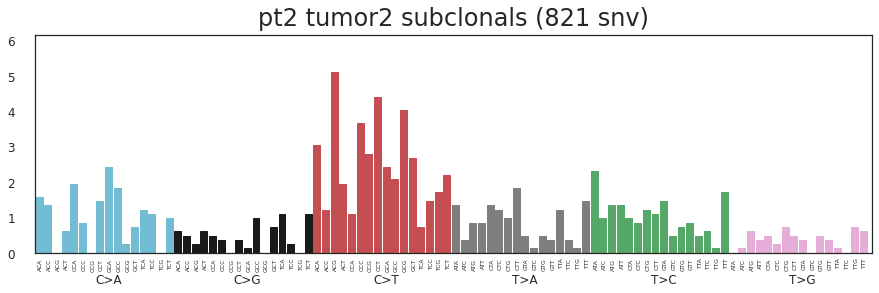

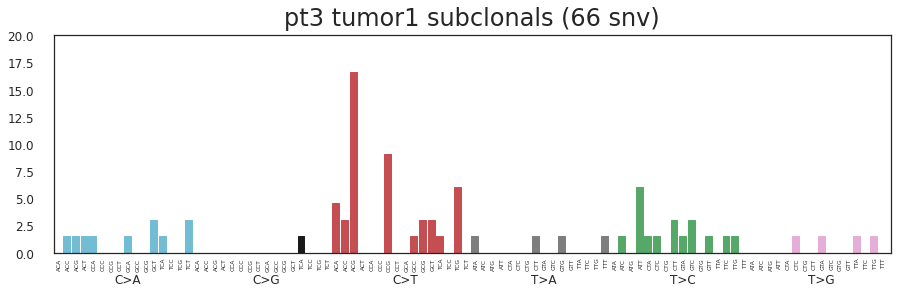

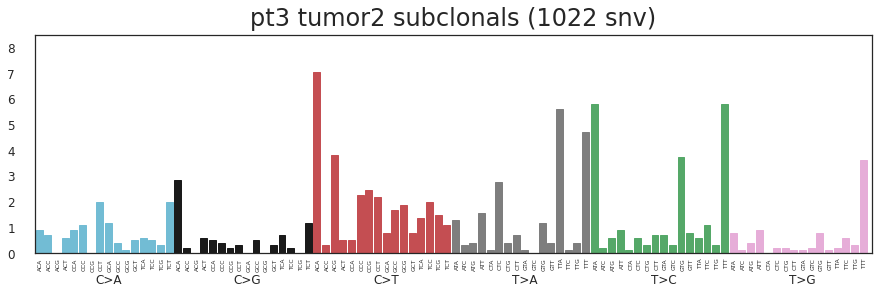

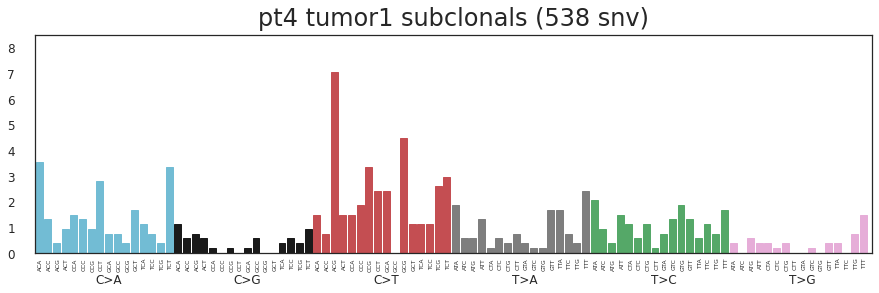

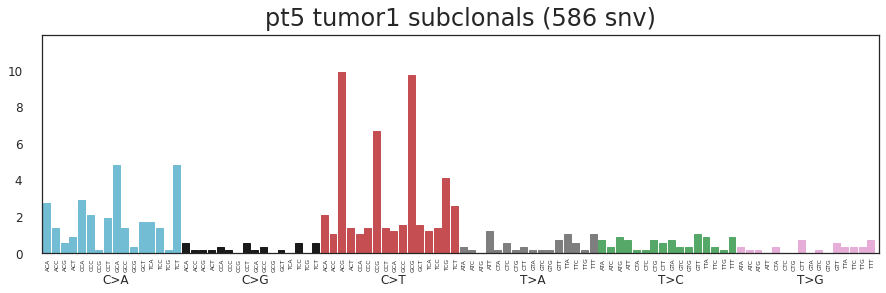

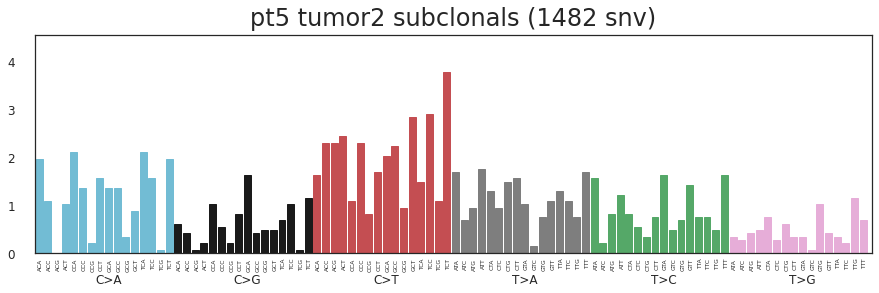

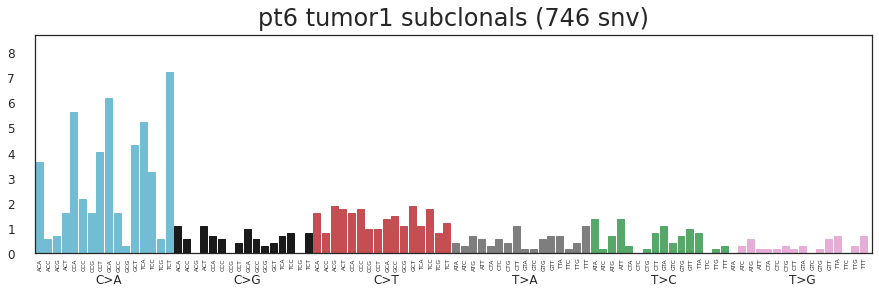

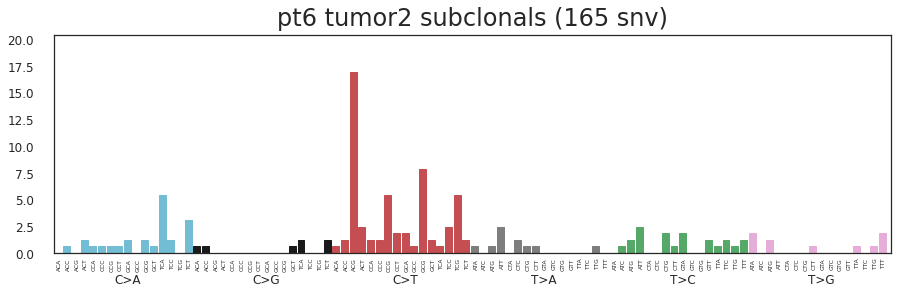

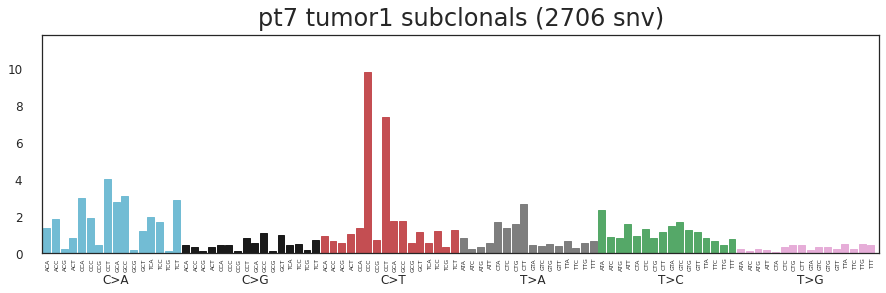

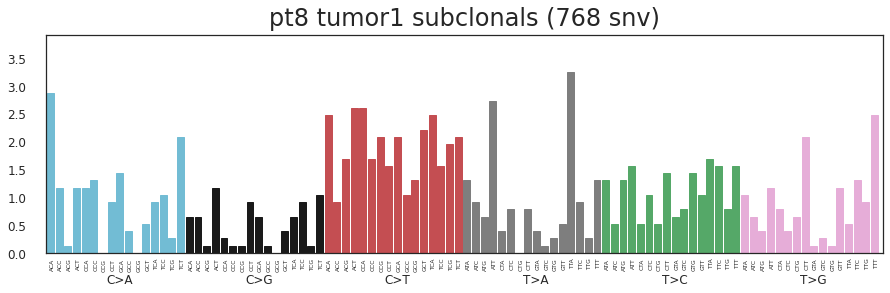

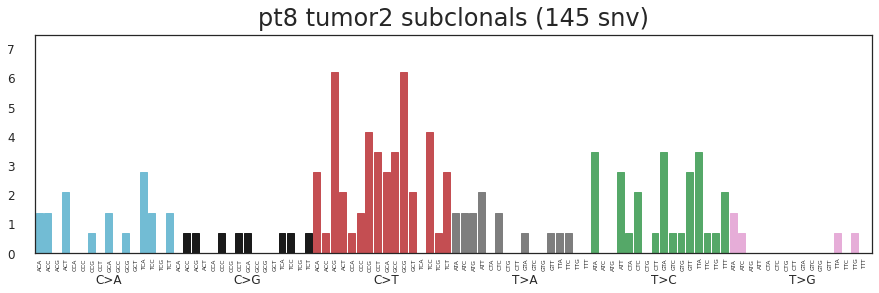

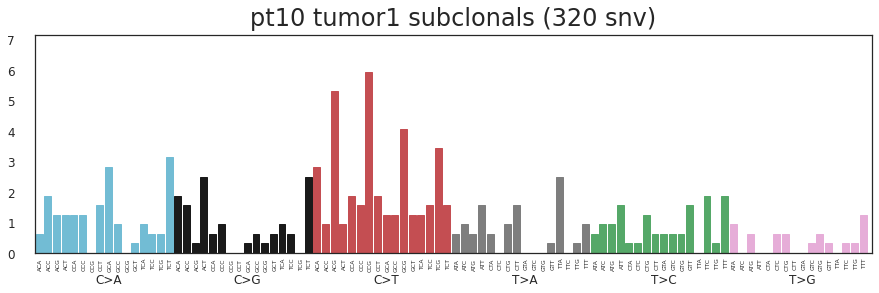

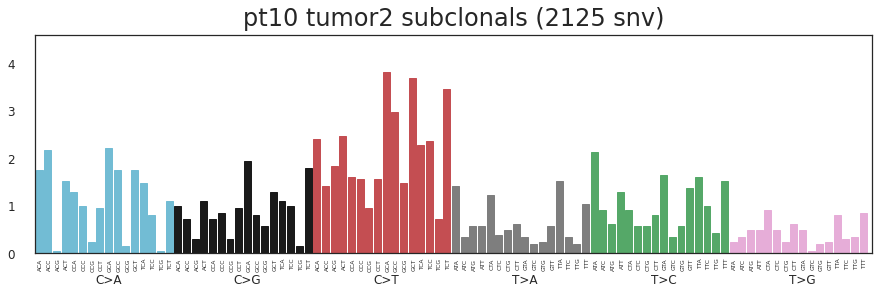

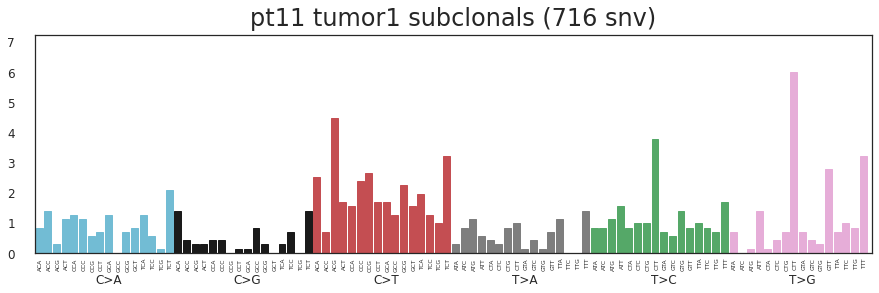

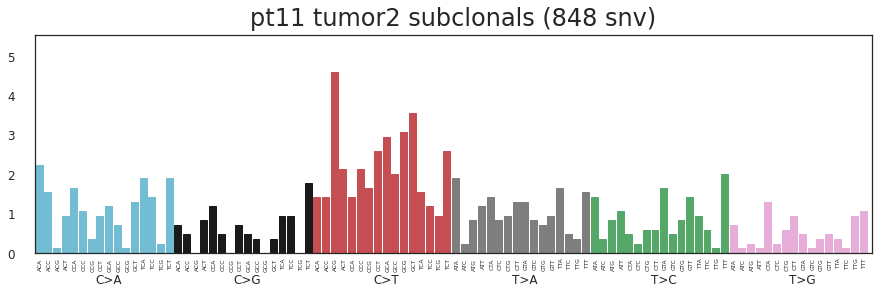

In [8]:

for pt in samples_dict.keys():
    if pt != 'pt9':
        for tumor in ['tumor1','tumor2']:
            normal_id = samples_dict[pt]['normal']
            tumor_id = samples_dict[pt][tumor]
            df = pd.read_csv("/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/"+pt+"/"+tumor_id+"_vs_"+normal_id+"/filter_and_annot/"+tumor_id+"_vs_"+normal_id+"_filt.maf.gz", sep='\t')
            df = df[(df['mut_type']=='snv')&(df['clonal']==False)]
            if len(df) != 0:
                dictionary = df_to_dict(df)
                dict_counts = change_dct_format(dictionary)
                fig, ax = plt.subplots()
                title = pt+' '+tumor+' subclonals ('+str(len(df))+ ' snv)'
                plot_signature(dict_counts, title=title ,ax=ax, fig=fig)
                plt.show()